<div style=" width:100%; height:10px; background:#b7b7b7;"></div>
<table style="width:50%;float:center;padding:100px;">
    <tr style="background-color: rgba(0, 0, 0, 0.0);">
        <td>
            <img src='img/ifood.png'>
        </td>
    </tr>
</table>
<div style="padding:20px;font-size:20px">
<h1><center>Customer Segmentation</center></h1>
</div>

# Customer segmentation

## Create and describe a customer segmentation based on customers behaviors

Cluster the customers based on the behaviors detected in the Data Analysis step.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Ignore warning 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('data/clustering_db.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,AcceptanceScore,Lifetime,TPV,AgeClass,RecencyClass
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,64,1,8,1617,61 - 70,31 - 60 days
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,67,0,7,27,61 - 70,31 - 60 days
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,56,0,7,776,51 - 60,< 30 days
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,37,0,7,53,31 - 40,< 30 days
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,40,0,7,422,31 - 40,> 90 days


## Select columns of interest

First step before create a clustering model is to select the columns I want to input in the model.

I will then delete some columns and convert types so the algorithm understands the data. For exemple, columns of type *object* need to be converted on *integers*. Let's do this: 

In [4]:
# Delete columns database to clustering model
df_cluster = df.drop(['ID', 'Year_Birth','Z_CostContact','Z_Revenue', 'Dt_Customer'], axis=1)

#### Convert Variables

In [5]:
# Convert Education variable from object to integer
ord_enc = OrdinalEncoder()
df_cluster ['EduCode'] = ord_enc.fit_transform(df_cluster[['Education']])
df_cluster ['EduCode'] = df_cluster ['EduCode'].astype(int)

# Convert Marital Status variable from object to integer
ord_enc = OrdinalEncoder()
df_cluster ['MaritalCode'] = ord_enc.fit_transform(df_cluster[['Marital_Status']])
df_cluster ['MaritalCode'] = df_cluster ['MaritalCode'].astype(int)

# Convert AgeClass variable from object to integer
ord_enc = OrdinalEncoder()
df_cluster ['AgeCode'] = ord_enc.fit_transform(df_cluster[['AgeClass']])
df_cluster ['AgeCode'] = df_cluster ['AgeCode'].astype(int)

# Convert RecencyClass variable from object to integer
ord_enc = OrdinalEncoder()
df_cluster ['RecencyCode'] = ord_enc.fit_transform(df_cluster[['RecencyClass']])
df_cluster ['RecencyCode'] = df_cluster ['RecencyCode'].astype(int)

In [6]:
dict_codes_edu = np.array(df_cluster[['Education','EduCode']].drop_duplicates().set_index('Education').to_dict())
dict_codes_marital = np.array(df_cluster[['Marital_Status','MaritalCode']].drop_duplicates().set_index('Marital_Status').to_dict())
dict_codes_age = np.array(df_cluster[['AgeClass','AgeCode']].drop_duplicates().set_index('AgeClass').to_dict())
dict_codes_rec = np.array(df_cluster[['RecencyClass','RecencyCode']].drop_duplicates().set_index('RecencyClass').to_dict())

In [7]:
print("Codes Education: ", dict_codes_edu)
print("\nCodes Martial Status: ", dict_codes_marital)
print("\nCodes AgeClass Status: ", dict_codes_age)
print("\nCodes RecencyClass Status: ", dict_codes_rec)

Codes Education:  {'EduCode': {'Graduation': 2, 'PhD': 4, 'Master': 3, 'Basic': 1, '2n Cycle': 0}}

Codes Martial Status:  {'MaritalCode': {'Single': 4, 'Together': 5, 'Married': 3, 'Divorced': 2, 'Widow': 6, 'Alone': 1, 'Absurd': 0, 'YOLO': 7}}

Codes AgeClass Status:  {'AgeCode': {'61 - 70': 3, '51 - 60': 2, '31 - 40': 0, '41 - 50': 1, '> 70': 5, '< 30': 4}}

Codes RecencyClass Status:  {'RecencyCode': {'31 - 60 days': 0, '< 30 days': 2, '> 90 days': 3, '61 - 90 days': 1}}


From the list above I have all the codes for the variables and the respctive value.

In [8]:
#Delete Education, Marital Status, AgeClass and RecencyClass
df_cluster = df_cluster.drop(['Education', 'Marital_Status','AgeClass','RecencyClass'], axis=1)
df_cluster.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Response,Age,AcceptanceScore,Lifetime,TPV,EduCode,MaritalCode,AgeCode,RecencyCode
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1,64,1,8,1617,2,4,3,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,67,0,7,27,2,4,3,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,56,0,7,776,2,5,2,2
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,37,0,7,53,2,5,0,2
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,40,0,7,422,4,3,0,3


In [9]:
# Export data for dev predict model
df_predictModel = pd.DataFrame(df_cluster)
df_predictModel.columns = df_cluster.columns
df_predictModel.to_csv('../data/data_predictModel.csv', index=False)
del df_predictModel

----

### Data Preprocessing

Now I have to normalize data to better fit the clusterization algorithm.

In [10]:
#Data normalization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

In [11]:
# Statistical data from normalized dataset
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,...,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03,2.229000e+03
mean,1.031931e-16,-3.745571e-16,3.270401e-16,-5.294603e-17,-4.527558e-17,1.188422e-16,5.503797e-18,-6.519883e-17,1.444436e-18,2.888871e-17,...,3.408370e-16,-4.474762e-16,2.012248e-16,-5.558586e-17,6.802793e-16,1.534090e-17,-1.936540e-16,-1.175472e-17,4.452846e-17,5.817589e-17
std,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,...,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00
min,-2.422355e+00,-8.255920e-01,-9.316759e-01,-1.696833e+00,-9.058622e-01,-6.627718e-01,-7.537323e-01,-6.883091e-01,-6.571915e-01,-8.470319e-01,...,-9.515183e-02,-4.198253e-01,-2.316251e+00,-5.029739e-01,-2.026912e+00,-9.994070e-01,-2.131844e+00,-3.467943e+00,-1.382374e+00,-1.255451e+00
25%,-7.868403e-01,-8.255920e-01,-9.316759e-01,-8.675308e-01,-8.345792e-01,-6.124639e-01,-6.807687e-01,-6.334528e-01,-6.329958e-01,-6.742194e-01,...,-9.515183e-02,-4.198253e-01,-6.929856e-01,-5.029739e-01,-4.505034e-01,-8.928996e-01,-3.497775e-01,-6.783201e-01,-6.217440e-01,-1.255451e+00
50%,-2.875190e-03,-8.255920e-01,-9.316759e-01,-3.674007e-03,-3.831205e-01,-4.615400e-01,-4.481972e-01,-4.688837e-01,-4.636259e-01,-3.861986e-01,...,-9.515183e-02,-4.198253e-01,-9.494056e-02,-5.029739e-01,-4.505034e-01,-3.470494e-01,-3.497775e-01,2.515541e-01,1.388857e-01,-2.151535e-01
75%,8.008990e-01,1.031365e+00,9.044917e-01,8.601828e-01,5.940499e-01,1.673095e-01,2.996799e-01,2.259636e-01,1.654621e-01,2.282458e-01,...,-9.515183e-02,-4.198253e-01,8.448445e-01,6.181550e-01,1.125905e+00,7.296736e-01,5.412557e-01,1.181428e+00,8.995155e-01,8.251442e-01
max,3.015636e+00,2.888322e+00,2.740659e+00,1.724040e+00,3.528531e+00,4.342870e+00,7.112657e+00,4.047624e+00,5.706276e+00,6.103870e+00,...,1.050952e+01,2.381943e+00,2.468110e+00,5.102671e+00,1.125905e+00,3.194321e+00,1.432289e+00,3.041177e+00,2.420775e+00,1.865442e+00


----

# Clustering data

### For data clustering I will use one of the most comum algorithm: the K-Means

In [12]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Checking k-means documentation it is recomended for datasets with many variables to run a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations. Let's do this:

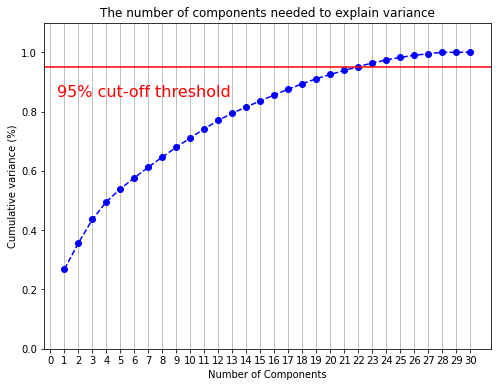

In [92]:
pca = PCA().fit(df_scaled)

plt.rcParams["figure.figsize"] = (8,6)

fig, ax = plt.subplots()
xi = np.arange(1, 31, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 31, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

The number of the components I choose is the number where the cumulative variance cuts the threshold for 95% of significance. In this case. the number of components must be 22.

In [14]:
#Create PCA object
pca = PCA(n_components = 22)
pca.fit(df_scaled)

PCA(n_components=22)

In [15]:
df_pca = pca.transform(df_scaled)

In [16]:
df_pca = pd.DataFrame(df_pca)
print(df_pca.shape)
df_pca.head()

(2229, 22)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,4.268783,-0.433413,-0.098659,1.557941,-2.056526,1.564283,0.637643,-1.217750,-0.509189,-1.149091,...,0.810429,0.326455,-0.778848,-1.191046,-0.587654,-0.491855,1.087213,0.034440,1.759500,0.468051
1,-2.541307,-0.702672,0.813763,-1.606855,-0.645675,0.743174,0.417079,0.077306,-0.194267,-1.101037,...,0.261608,-0.580165,0.032113,0.444497,-0.040687,0.021117,-0.257763,0.154217,0.371296,-0.491525
2,1.505187,-1.307232,-0.753194,-0.295465,-0.087259,-0.435701,-1.213647,-0.559625,-0.714315,0.729083,...,-0.504420,0.757303,-0.015828,-0.645037,0.587809,0.550922,0.473847,-0.595958,-0.518478,-0.770892
3,-2.928812,1.030787,-1.634110,0.054289,0.418676,-0.348409,-0.813239,-0.828733,-0.724137,0.701025,...,0.046048,0.148453,-0.083500,0.021736,0.427929,0.023634,-0.074587,-0.005597,-0.256968,-0.008090
4,-0.694051,-0.040279,-1.029468,1.011553,1.469806,-1.370052,0.468785,0.097712,0.511015,1.366432,...,1.667730,0.403423,-0.337526,-0.613549,-0.107688,-0.056231,0.036489,-0.064102,-0.593435,0.246182


In [17]:
# Define seed for random state
seed = 123

In [18]:
# Create kmeans object with k-means++ property
kmeans = KMeans(n_clusters = 2, init='k-means++',max_iter = 600, random_state=seed)

In [19]:
# Fit kmeans into normalized data
kmeans.fit(df_pca)

KMeans(max_iter=600, n_clusters=2, random_state=123)

I first chose two cluster to fit the model, but I have to check if this number of cluster is good enough to cluster all the data I have. Eu escolhi 2 cluters de início pra poder

To do this I'll use cluster inertia to check how stable cluster are when I promote n-iterations. I want the cluster to be stable with n-iterations so they  willl not change on each round. 

In [20]:
# inertia on the fitted data
kmeans.inertia_

49769.62740339018

In [21]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_pca)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

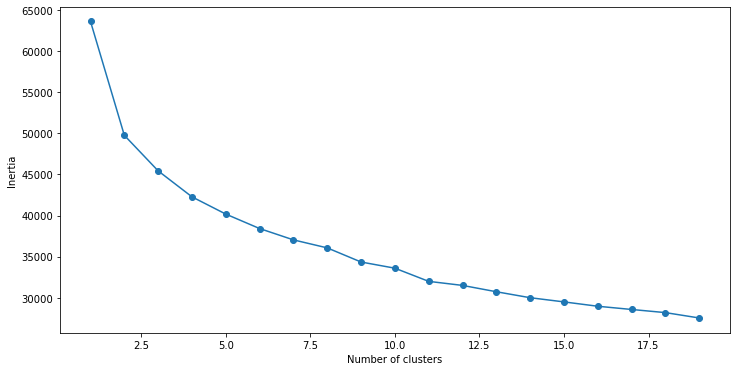

In [22]:
# 
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [23]:
# vamos reinstanciar o nosso modelo, agora com 5 clusters 
kmeans = KMeans(n_clusters = 5, init='k-means++', max_iter = 600, random_state=seed)
kmeans.fit(df_pca)
pred = kmeans.predict(df_pca)

In [24]:
df_final = pd.DataFrame(df_cluster)
df_final['cluster'] = pred
df_final['cluster'].value_counts()

0    990
1    572
3    468
4    169
2     30
Name: cluster, dtype: int64

<AxesSubplot:ylabel='cluster'>

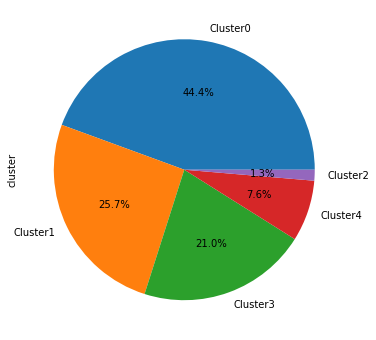

In [93]:
# Pie Chart 
df_final["cluster"].value_counts(bins = 5).plot(kind = 'pie', labels = ['Cluster0', 'Cluster1', 'Cluster3','Cluster4', 'Cluster2'], autopct="%.1f%%")

In [25]:
df_final.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,AcceptanceScore,Lifetime,TPV,EduCode,MaritalCode,AgeCode,RecencyCode,cluster
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,64,1,8,1617,2,4,3,0,3
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,67,0,7,27,2,4,3,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,56,0,7,776,2,5,2,2,3
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,37,0,7,53,2,5,0,2,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,40,0,7,422,4,3,0,3,0


From the pie chart I can notice that over 90% of the customers are custered into 3 groups (Cluster 0, Cluster 1 and Cluster 3). Let's focus the analysis into those groups and see if there is a standard behavior from customer who accepted the last campaign

To do that I will split the database into two groups:
- Positive targets (customers who bought the new gadget in the last campaign)
- Negative targets (customers who did not buy the new gadget in the last campaign)

In [51]:
# Split data into two datasets: 
pos_data = df_final[df_final['Response'] == 1].copy()
neg_data = df_final[df_final['Response'] == 0].copy()

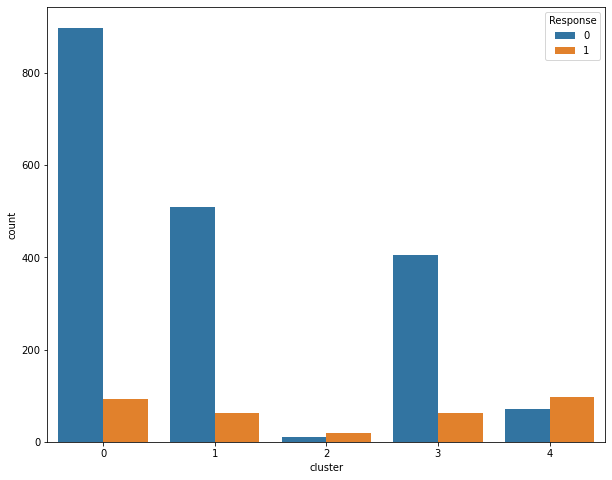

In [52]:
#Plot the splited data by cluster

%matplotlib inline
fig,ax = plt.subplots(figsize=(10,8))

ax = sns.countplot(x="cluster", hue='Response', data=df_final)

Focousing in clusters 0, 1 and 3 (that represent 90% of the customers) I can see that there are more customers customers in cluster 3 who accepted the last campaign than the customer who rejected it. **I will check the qualities for these customers to see what can influence then to this behaviour.**

Cluster 0 has the biggest difference between customers who accepted and those who didn't. **I will see if there is some  standard quality that can help to understand this behaviour.**

From the bar chart above I can notice that customers in cluster 4 accepted (Response = 1) more then rejected (Response = 0) the last campaign. 

Let's explore some qualities for the clusters 0, 1 and 3 to see.

## Cluster 0

In [39]:
#pos_data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,AcceptanceScore,Lifetime,TPV,EduCode,MaritalCode,AgeCode,RecencyCode,cluster
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,64,1,8,1617,2,4,3,0,3
8,30351.0,1,0,19,14,0,24,3,3,2,...,1,47,1,7,46,4,5,1,2,0
15,82800.0,0,0,23,1006,22,115,59,68,45,...,1,75,3,8,1315,4,4,5,2,4
33,46610.0,0,2,8,96,12,96,33,22,43,...,1,69,1,8,302,4,2,3,2,1
39,48948.0,0,0,53,437,8,206,160,49,42,...,1,78,2,8,902,4,2,5,0,3


In [41]:
def best_fit_line(mu, sigma, bins):
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    
    return y

In [88]:
# Function to create plots

def create_plot(column, data_pos, data_neg):
    
    fig, ax = plt.subplots(figsize=(6,4))
    
    # Distribution for positive customers
    n, bins, patches = ax.hist(data_pos[column], 50, density=True, alpha=0.1, color='green')
    
    # Check sigma == 0
    if(data_pos[column].std()==0):
        print('data_pos: ',column)
        
    y = best_fit_line(data_pos[column].mean(), data_pos[column].std(), bins)
    ax.plot(bins, y, '--', color='green', label='positive customers')

    # Distribution for negative customers
    n, bins, patches = ax.hist(data_neg[column], 50, density=True, alpha=0.1, color='orange')
    
    # Check sigma == 0
    if(data_neg[column].std()==0):
        print('data_neg: ', column)

    y = best_fit_line(data_neg[column].mean(), data_neg[column].std(), bins)
    ax.plot(bins, y, '--', color='orange', label='negative customers')
    
    ax.set_xlabel(column)
    ax.set_ylabel('Probability density')

    ax.legend()
    ax.set_title(column)

In [ ]:
pos_data_c0 = pos_data[pos_data['cluster']==0]
neg_data_c0 = neg_data[neg_data['cluster']==0]

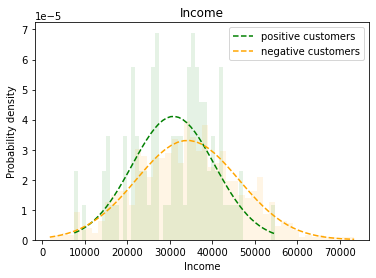

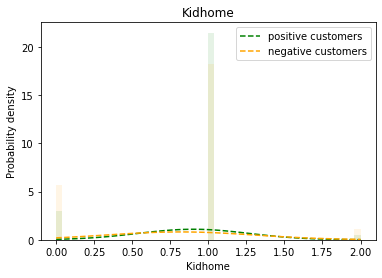

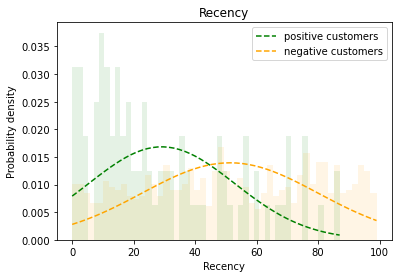

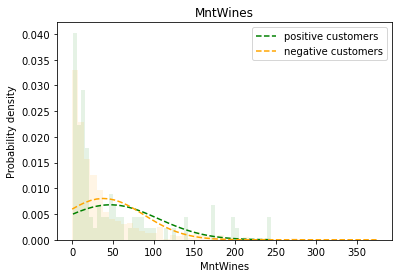

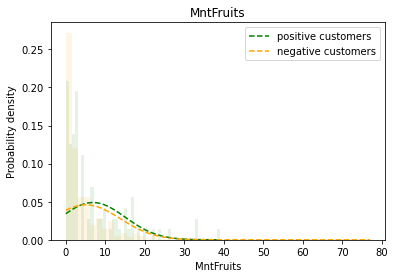

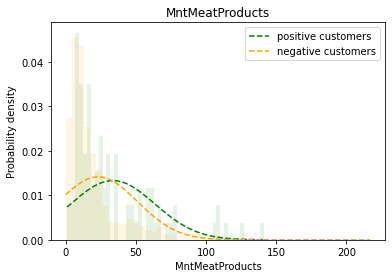

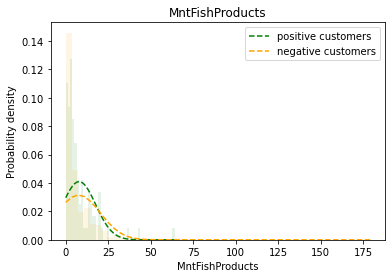

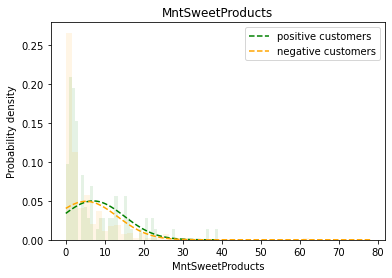

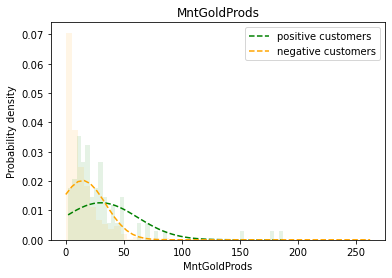

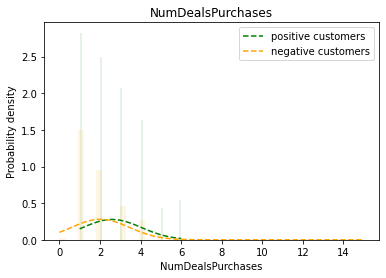

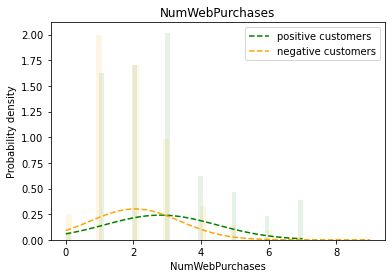

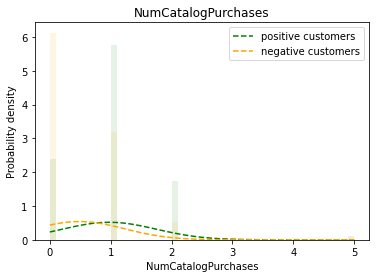

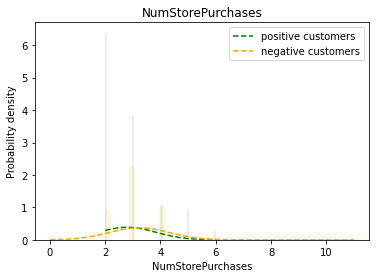

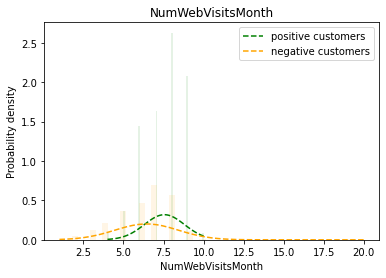

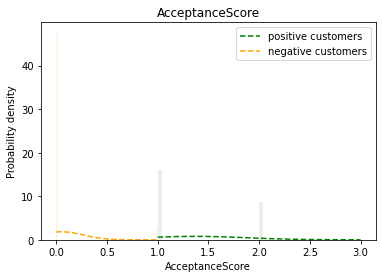

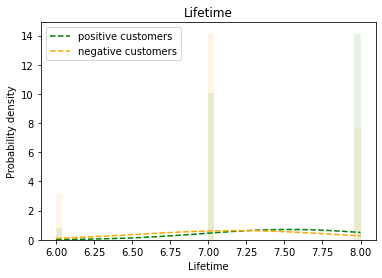

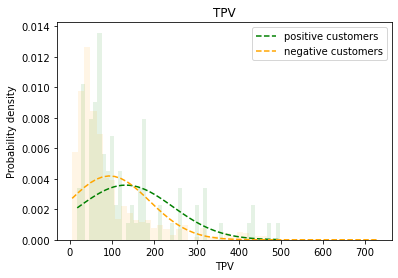

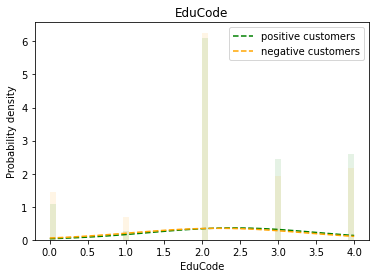

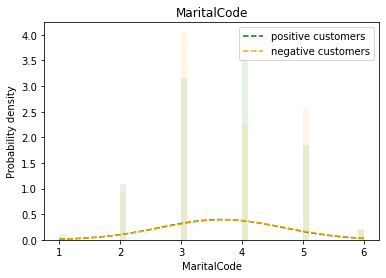

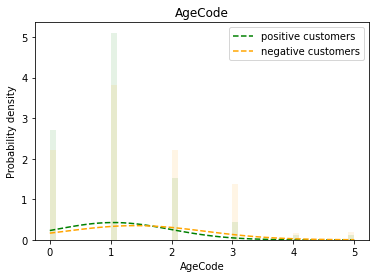

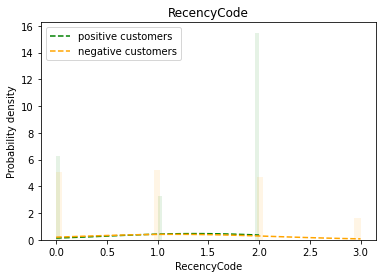

In [76]:
#Histrograms for Negative customers
columns= ['Income', 'Kidhome','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptanceScore', 'TPV', 'EduCode', 'MaritalCode', 'AgeCode'] 

length=len(columns)

for col,j in zip(columns,range(length)):
    create_plot(col,pos_data_c0, neg_data_c0)

plt.show()

### Let's point some qualities from positive and negative customers from cluster 0:

#### Income

**Positive customers** have higher income and more concentrate than the negative ones.

#### Recency

**Positive customers** have better recency meaning that they take less time to do new purchase than the negative cuustomers. On average, **positive customers take 30 days to do another purchase.**
**Negative customer** take 50 days on average to come back for another purchase.

#### Type of products
Positive and negative customer have similar products preferences except for the **Gold Products that are way more consumed by positive customers.**

#### Deal Purchases
Positive customers buy with discount more than negative ones.

#### Web Purchases
Positive customers buy on web!

#### Website visits
Positive customers visit the website a lot more than negative customers.

#### Campaign Acceptance
Positive customers accepted more campaigns which is a behavior we hope for since they accepted the last one.

#### TPV
Positive customers have higher TPV. They spent 150 on average in the past two years while the negative ones spent 100.

#### Marital Status
The main difference in this quality is that positive customers usualy are single or divorced while negative customers are married or together.

#### Age
Positive and negative customers have similar age and they are mostly above 30 years old and not much older than 50.


# Cluster 1

In [78]:
pos_data_c1 = pos_data[pos_data['cluster']==1]
neg_data_c1 = neg_data[neg_data['cluster']==1]

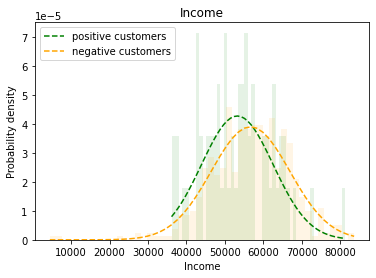

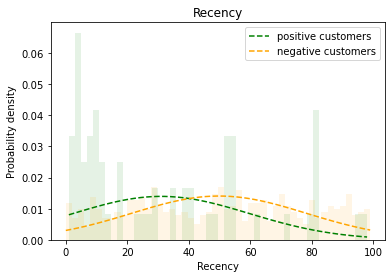

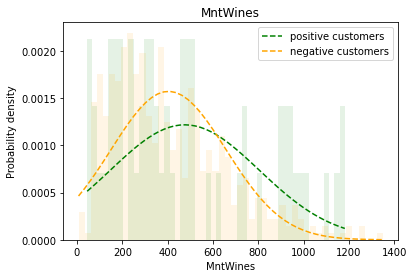

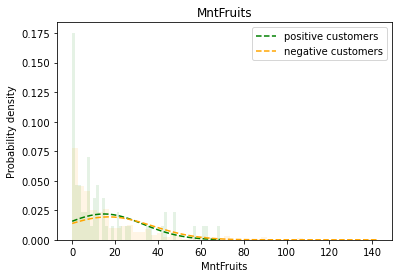

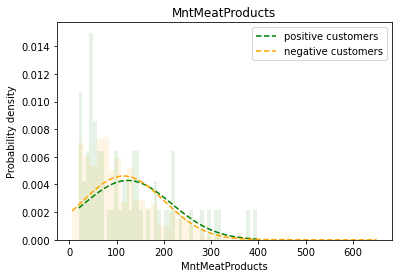

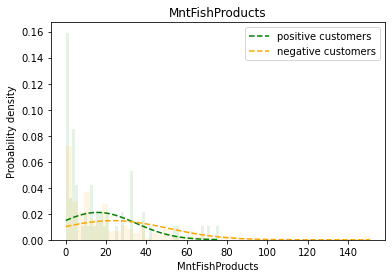

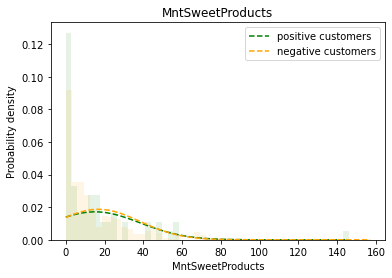

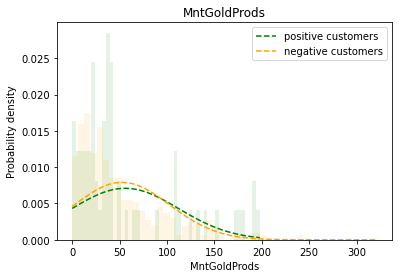

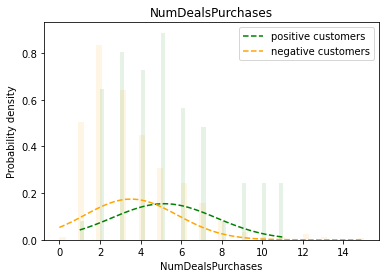

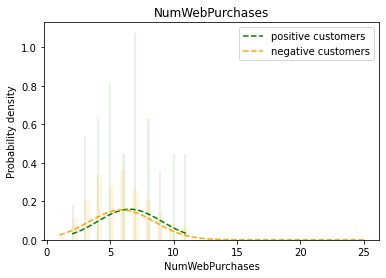

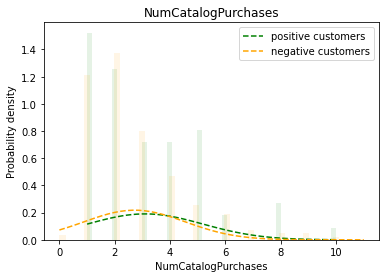

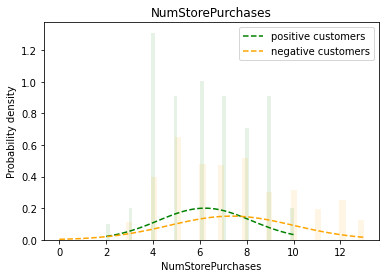

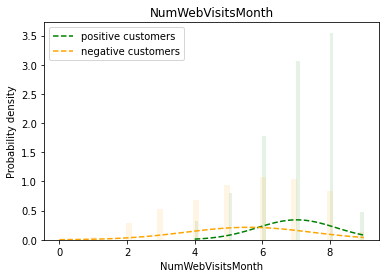

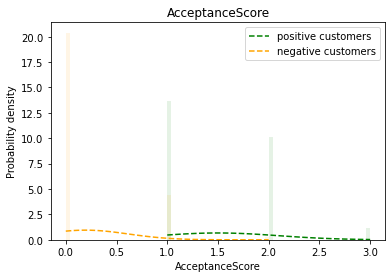

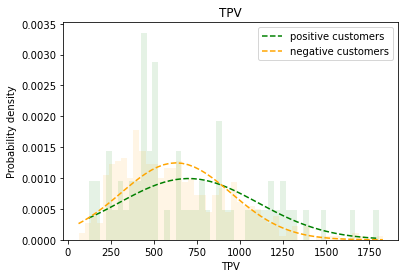

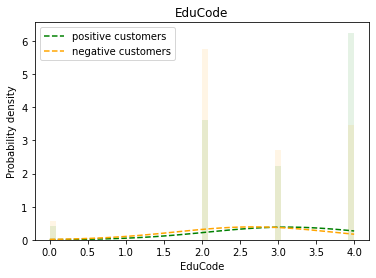

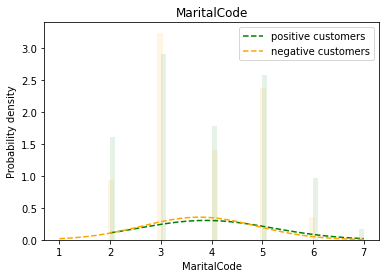

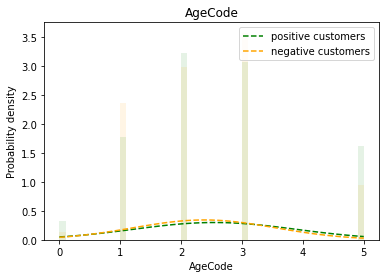

In [91]:
#Histrograms for Negative customers
columns= ['Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptanceScore', 'TPV', 'EduCode', 'MaritalCode', 'AgeCode'] 

length=len(columns)

for col,j in zip(columns,range(length)):
    create_plot(col,pos_data_c1, neg_data_c1)

plt.show()

In [80]:
print("Codes Education: ", dict_codes_edu)
print("\nCodes Martial Status: ", dict_codes_marital)
print("\nCodes AgeClass Status: ", dict_codes_age)
print("\nCodes RecencyClass Status: ", dict_codes_rec)

Codes Education:  {'EduCode': {'Graduation': 2, 'PhD': 4, 'Master': 3, 'Basic': 1, '2n Cycle': 0}}

Codes Martial Status:  {'MaritalCode': {'Single': 4, 'Together': 5, 'Married': 3, 'Divorced': 2, 'Widow': 6, 'Alone': 1, 'Absurd': 0, 'YOLO': 7}}

Codes AgeClass Status:  {'AgeCode': {'61 - 70': 3, '51 - 60': 2, '31 - 40': 0, '41 - 50': 1, '> 70': 5, '< 30': 4}}

Codes RecencyClass Status:  {'RecencyCode': {'31 - 60 days': 0, '< 30 days': 2, '> 90 days': 3, '61 - 90 days': 1}}


### Let's point some qualities from positive and negative customers from cluster 1:

#### Income

**Positive customers** have **lower income** and more concentrate than the negative ones.

#### Recency

**Positive customers** have better recency meaning that they take less time to do new purchase than the negative cuustomers. On average, **positive customers take 30 days to do another purchase.**
**Negative customer** take 50 days on average to come back for another purchase.

#### Type of products
Positive and negative customer have similar products preferences except for the **Wine Products that are way more consumed by negative customers.**

#### Deal Purchases
Positive customers buy with discount more than negative ones.

#### Web Purchases
Positive and negative customers have similar behavior about buying on web.

#### Website visits and Store purchases
Positive customers visit the website a lot more than negative customers and they also by less on stores

#### Campaign Acceptance
Positive customers accepted more campaigns which is a behavior we hope for since they accepted the last one.

#### TPV
Positive customers have a slightly higher TPV. They spent 750 on average in the past two years while the negative ones spent 700. The TPV amounts are much higher than the TPV from customers in cluster 0.

#### Marital Status
Marital status is similar for positive and negative customers and most of them are married, together or single.

#### Age
Positive and negative customers have similar age and they are mostly above 51 years old. It's a big difference from the public on cluster 0 which is younger in general.

# Cluster 3

In [96]:
pos_data_c3 = pos_data[pos_data['cluster']==3]
neg_data_c3 = neg_data[neg_data['cluster']==3]

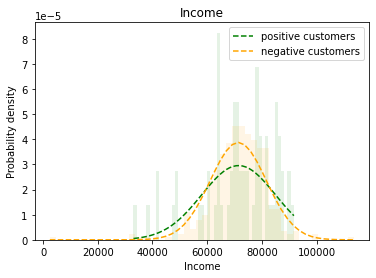

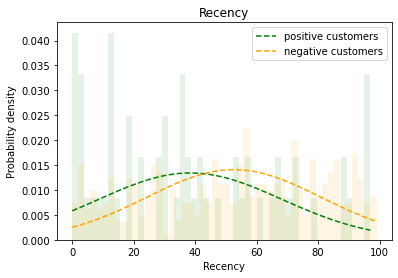

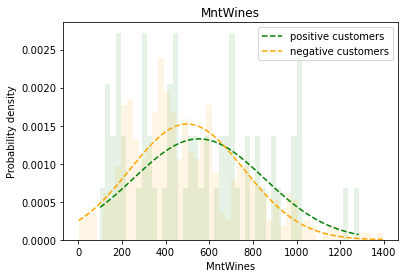

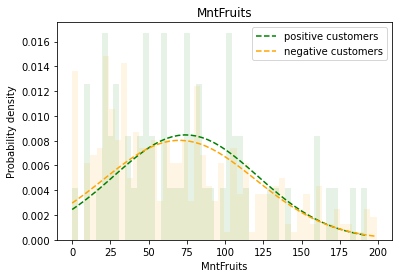

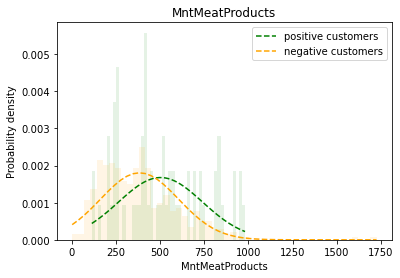

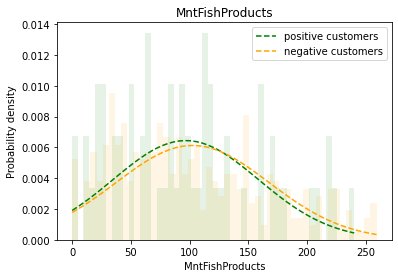

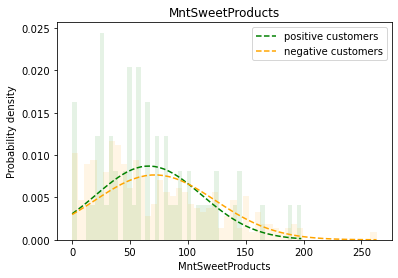

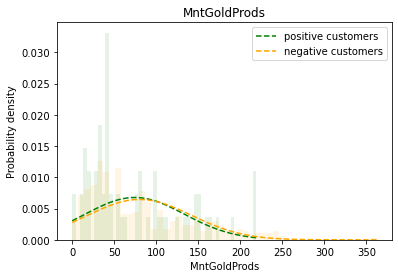

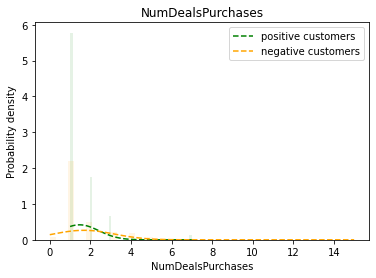

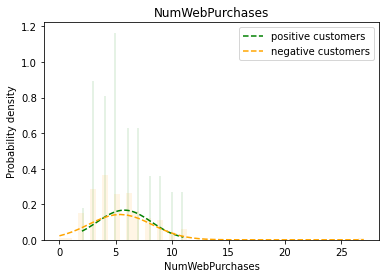

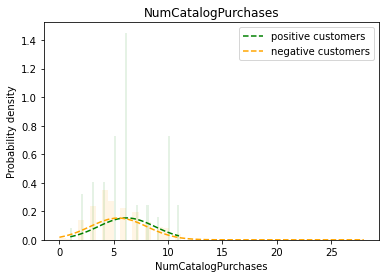

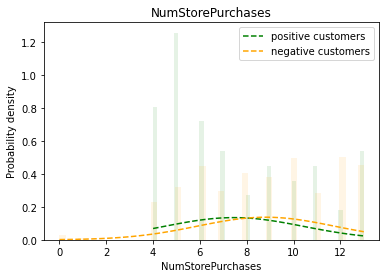

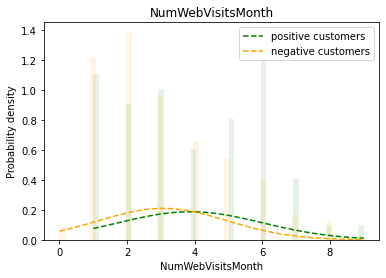

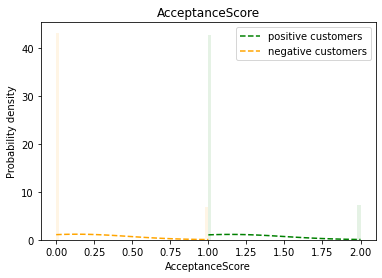

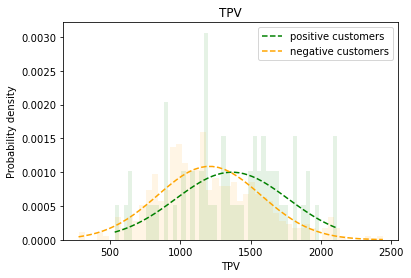

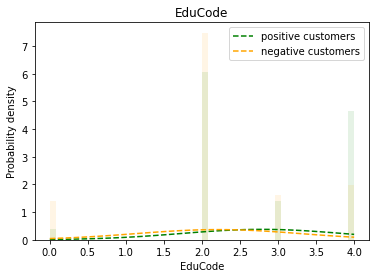

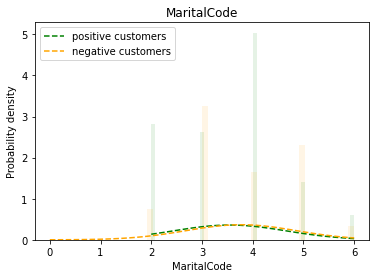

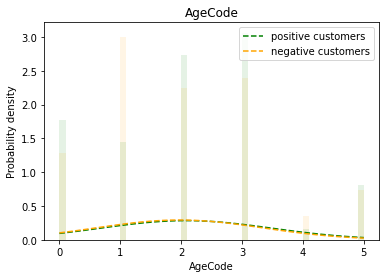

In [97]:
#Density probability
columns= ['Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptanceScore', 'TPV', 'EduCode', 'MaritalCode', 'AgeCode'] 

length=len(columns)

for col,j in zip(columns,range(length)):
    create_plot(col,pos_data_c3, neg_data_c3)

plt.show()

### Let's point some qualities from positive and negative customers from *Cluster 2*:

#### Income

**Positive customers** have **lower income**. The income for the customers in this clusters are way higher than comparing to the Clusters 0 and 1:
- Cluster 0 average income: 20k and 45k
- Cluster 1 range income: 40k and 70k
- Cluster 3 range income: 60k and 100k

#### Recency

Positive customers take 40 days on average to come back for another purchase.

#### Type of products
Customers in this cluster buy more fish and fruits than customers in the other clusters.

#### Deal Purchases
Positive customers almost never buy with discounts.

#### Web Purchases
Positive and negative customers have similar behavior about buying on web but positive customers buy more times in the website.

#### Website visits and Store purchases
Positive customers visit the website a lot more than negative customers and they also by less on stores

#### Campaign Acceptance
Positive customers accepted more campaigns then negative ones, but is it not a good performance. Positive customer accepted one or two campaigns.

#### TPV
Positive customers have a slightly higher TPV. They spent 1300 on average in the past two years while the negative ones spent 1000. The TPV amounts are much higher than the TPV from customers in clusters 0 and 1.

#### Marital Status
Positive customers are married, together, divorced.

#### Age
Positive and negative customers have similar age and they are mostly between 51 and 70 years old.

# Conclusions

By clustering the custumers I could see that 90% of the customers were clusterized into 3 different groups. The main qualities of customers who accepted the last campaign are:

- Cluster 0: Customers age between 30 and 50 years old, single or divorced who spend more in Gold products and buy products online. The average TPV for the past two years is between 100 and 150 but they have good recency, 30 days on average. They also don't have a good acceptance score, in other words, most of the customers who accepted the last campaign did it for the first time.

- Cluster 1: Customers age above 51 years old, most of them married or together who spend more money in wine. They spent 750 on average in the past two years and the they usually come back to another purchase within 30 days.

- Clustar 3: Customers age between 51 and 60 years old most of them are married, together, divorced. They spend money specially on wine, fish and fruits. They have a high TPV, around 1300 in the past two years and they also have accepted alt least one previous campaign
. In other words, most positive customers in this cluster have accepted other campaigns too.